In [15]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

In [30]:
#Dynamika populacji bakterii

n = 30
t = np.linspace(0, 10, n+1)
y = (1/2) * (np.cos((-t**2)/9.0) + 1) * 100

In [38]:
bakterie = pd.DataFrame(
    {
        "t": t,
        "Liczba bakterii": y
    }
)

bakterie.to_csv('bakterie.csv', index=False)

In [39]:
bakterie = pd.read_csv('bakterie.csv')
bakterie.head()

,t,Liczba bakterii
0,0.000000,100.000000
1,0.333333,99.996190
2,0.666667,99.939046
3,1.000000,99.691675
4,1.333333,99.027707


In [44]:
x_space = np.linspace(0, 10, 200)
probable_bakterie = sc.interpolate.CubicSpline(t, y, bc_type='natural')(x_space)

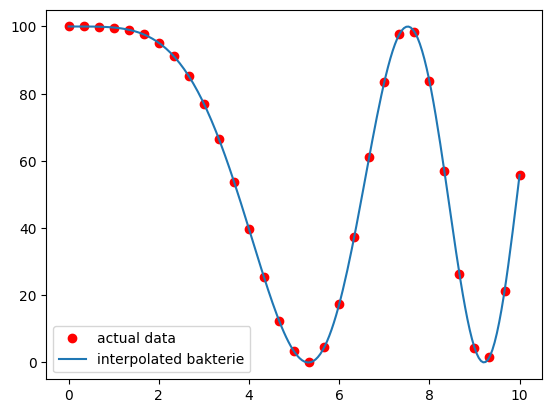

In [50]:
plt.plot(bakterie['t'], bakterie['Liczba bakterii'], 'ro', label='actual data')
plt.plot(x_space, probable_bakterie, label='interpolated bakterie')
plt.legend()
plt.show()

In [69]:
print(bakterie.shape[0])

def fPrim(x_space, f):
    lista = []
    for i in range(1,f.shape[0]-1):
        fx = (f[i+1] - f[i-1])/(2*(x_space[i+1]-x_space[i]))
        lista.append(fx)
    else:
        return np.array(lista)

31


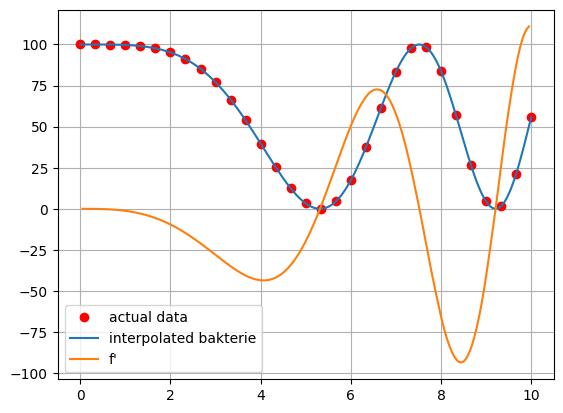

In [71]:
plt.plot(bakterie['t'], bakterie['Liczba bakterii'], 'ro', label='actual data')
plt.plot(x_space, probable_bakterie, label='interpolated bakterie')
plt.plot(x_space[1:-1], fPrim(x_space, probable_bakterie), label="f'")
plt.legend()
plt.grid()
plt.show()